**Problem 1**

**a)**

Explore the data graphically in order to investigate the association
between Type and the other features. Which of the other
features seem most likely to be useful in predicting Type? Scatterplots
and boxplots may be useful tools to answer this question.
Describe your findings.

In [15]:
wine.train = read.csv(file = file.path("C:/Users/Vance He/Desktop/UMich/2020_WN/STATS503/hw/hw2/wine_train.csv"))
wine.test = read.csv(file = file.path("C:/Users/Vance He/Desktop/UMich/2020_WN/STATS503/hw/hw2/wine_test.csv"))

In [16]:
dim(wine.train)
dim(wine.test)

[1] 123  14

[1] 55 14

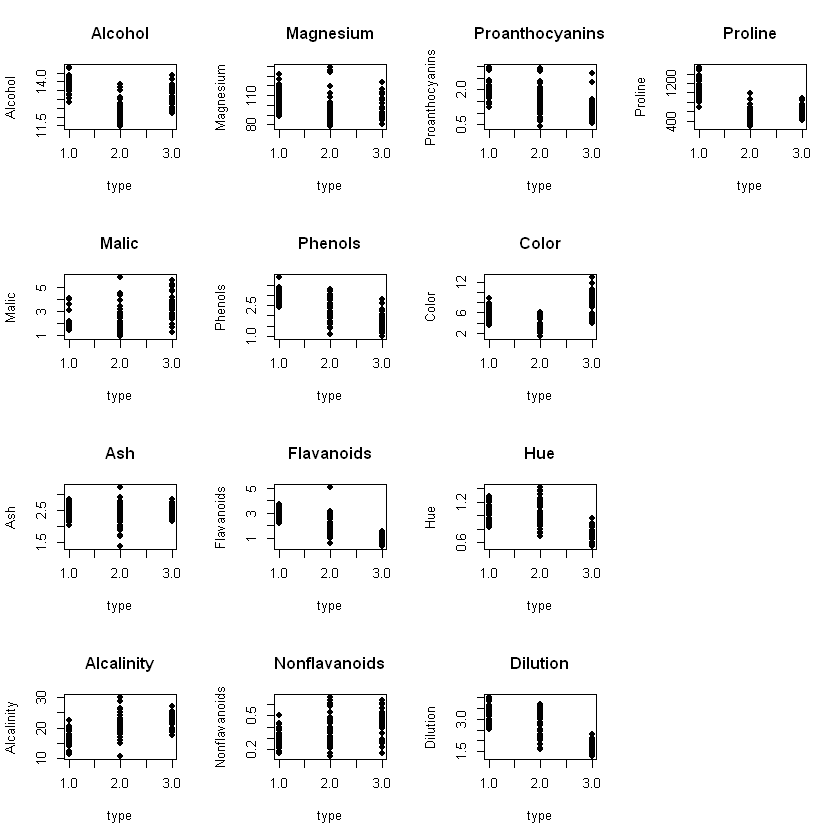

In [17]:
par(mfcol = c(4,4))
col = c(colnames(wine.train)[2:14])
for(i in 1:length(col)){
    plot(x=wine.train$Type, y=wine.train[,i+1], main = col[i], xlab="type", ylab=col[i], pch=19)
}

In [18]:
cor(wine.train$Type, wine.train)

Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
1,-0.3768907,0.4921756,0.01224414,0.5563797,-0.2462753,-0.7259672,-0.8413666,0.4836222,-0.5125264,0.2517423,-0.6551385,-0.7771772,-0.6554285


In [19]:
wine.train$Type = factor(wine.train$Type)
levels(wine.train$Type)=c("type1","type2","type3")
wine.test$Type = factor(wine.test$Type)
levels(wine.test$Type)=c("type1","type2","type3")

In [20]:
summary(wine.train)

    Type       Alcohol          Malic            Ash          Alcalinity   
 type1:41   Min.   :11.45   Min.   :0.890   Min.   :1.360   Min.   :10.60  
 type2:49   1st Qu.:12.37   1st Qu.:1.655   1st Qu.:2.225   1st Qu.:17.05  
 type3:33   Median :13.05   Median :1.900   Median :2.380   Median :19.50  
            Mean   :13.05   Mean   :2.387   Mean   :2.377   Mean   :19.60  
            3rd Qu.:13.72   3rd Qu.:3.170   3rd Qu.:2.600   3rd Qu.:21.55  
            Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00  
   Magnesium         Phenols        Flavanoids    Nonflavanoids  
 Min.   : 78.00   Min.   :0.980   Min.   :0.340   Min.   :0.140  
 1st Qu.: 88.00   1st Qu.:1.770   1st Qu.:1.095   1st Qu.:0.270  
 Median : 97.00   Median :2.400   Median :2.110   Median :0.340  
 Mean   : 99.11   Mean   :2.293   Mean   :2.040   Mean   :0.362  
 3rd Qu.:106.50   3rd Qu.:2.800   3rd Qu.:2.895   3rd Qu.:0.430  
 Max.   :139.00   Max.   :3.880   Max.   :5.080   Max.   :0.660  
 Proan

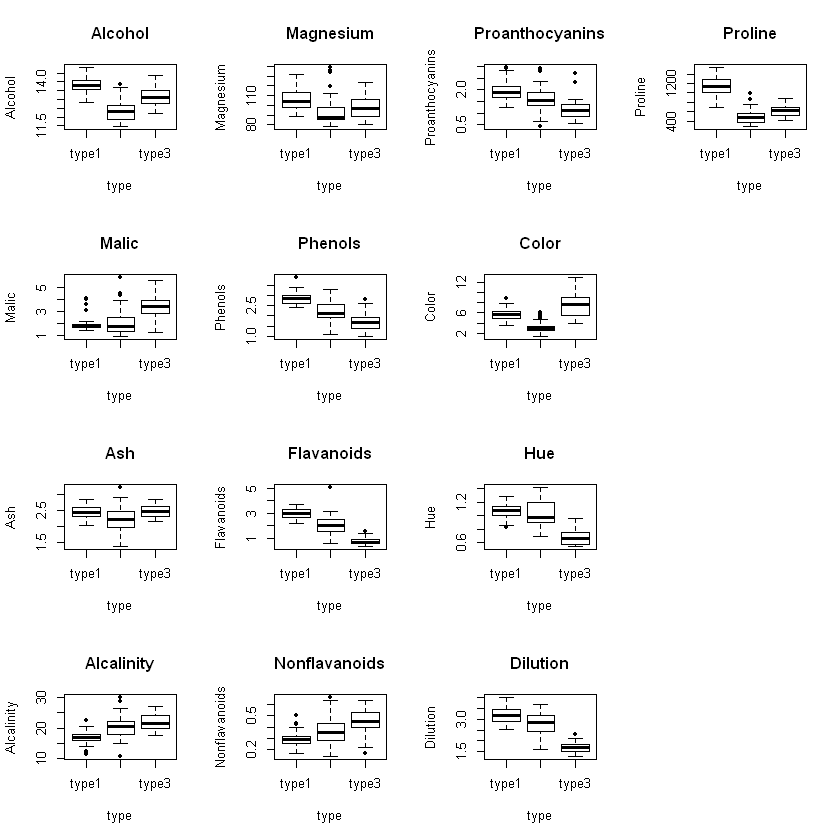

In [21]:
par(mfcol = c(4,4))
col = c(colnames(wine.train)[2:14])
for(i in 1:length(col)){
    plot(wine.train$Type, wine.train[,i+1], main = col[i], xlab="type", ylab=col[i], pch=19)
}

**b)**

Perform LDA, QDA and Naive Bayes on the training data in order to predict Type. What are the test errors of the models obtained?

In [106]:
library(MASS)
library(e1071)
mod_lda = lda(Type ~ Alcohol + Malic + Ash + Alcalinity 
              + Magnesium + Phenols + Flavanoids + Nonflavanoids + Proanthocyanins 
              + Color + Hue + Dilution + Proline, data = wine.train) 
mod_qda = qda(Type ~ Alcohol + Malic + Ash + Alcalinity 
              + Magnesium + Phenols + Flavanoids + Nonflavanoids + Proanthocyanins 
              + Color + Hue + Dilution + Proline, data = wine.train)
mod_nb = naiveBayes(Type ~ Alcohol + Malic + Ash + Alcalinity 
              + Magnesium + Phenols + Flavanoids + Nonflavanoids + Proanthocyanins 
              + Color + Hue + Dilution + Proline, data = wine.train)

In [22]:
library(MASS)
library(e1071)
mod_lda = lda(Type ~ Alcohol + Malic + Alcalinity 
              + Phenols + Flavanoids + Nonflavanoids + Proanthocyanins 
              + Hue + Dilution + Proline, data = wine.train) 
mod_qda = qda(Type ~ Alcohol + Malic + Alcalinity 
              + Phenols + Flavanoids + Nonflavanoids + Proanthocyanins 
              + Hue + Dilution + Proline, data = wine.train)
mod_nb = naiveBayes(Type ~ Alcohol + Malic + Alcalinity 
              + Phenols + Flavanoids + Nonflavanoids + Proanthocyanins 
              + Hue + Dilution + Proline, data = wine.train)

Warning message:
"package 'e1071' was built under R version 3.6.2"

**calculate test errors**

In [23]:
wine_lda_train_predict = predict(mod_lda, wine.train)$class
wine_lda_test_predict = predict(mod_lda, wine.test)$class
train_lda_err = mean(wine_lda_train_predict != wine.train$Type)
test_lda_err = mean(wine_lda_test_predict != wine.test$Type)
train_lda_err
test_lda_err

[1] 0.008130081

[1] 0.05454545

In [24]:
wine_qda_train_predict = predict(mod_qda, wine.train)$class
wine_qda_test_predict = predict(mod_qda, wine.test)$class
train_qda_err = mean(wine_qda_train_predict != wine.train$Type)
test_qda_err = mean(wine_qda_test_predict != wine.test$Type)
train_qda_err
test_qda_err

[1] 0

[1] 0.03636364

In [26]:
pred_nb_train = predict(mod_nb, wine.train)
mean(pred_nb_train != wine.train$Type)

[1] 0.04065041

In [27]:
pred_nb_test = predict(mod_nb, wine.test)
mean(pred_nb_test != wine.test$Type)

[1] 0.03636364

### Problem 2

Use the k-nearest neighbor classifier on the Theft dataset. Use crossvalidation
to select the best k and use the test data to evaluate the performance
of the selected model. Show the training, cross-validation
and test errors for each choice of k and report your findings.

In [2]:
theft_train = read.csv(file = file.path("C:/Users/Vance He/Desktop/UMich/2020_WN/STATS503/hw/hw2/theft_train.csv"))
theft_test = read.csv(file = file.path("C:/Users/Vance He/Desktop/UMich/2020_WN/STATS503/hw/hw2/theft_test.csv"))

In [3]:
summary(theft_train)

       X                Y           theft              hour      
 Min.   :-122.5   Min.   :37.71   Mode :logical   Min.   : 0.00  
 1st Qu.:-122.4   1st Qu.:37.76   FALSE:1808      1st Qu.:10.00  
 Median :-122.4   Median :37.78   TRUE :1692      Median :15.00  
 Mean   :-122.4   Mean   :37.77                   Mean   :13.86  
 3rd Qu.:-122.4   3rd Qu.:37.79                   3rd Qu.:19.00  
 Max.   :-122.4   Max.   :37.81                   Max.   :23.00  

In [4]:
library(class)
library(dplyr)
library(ggplot2)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [5]:
train_label = theft_train$theft
train_x = theft_train %>% select("X","Y","hour") 

test_label = theft_test$theft
test_x = theft_test %>% select("X","Y","hour") 

In [6]:
train_label=factor(train_label)
levels(train_label)=c("True","False")

test_label=factor(test_label)
levels(test_label)=c("True","False")

In [7]:
# 503 way
library(FNN)
kfold_CV_knn = function(k,k_knn,train,train_label){
    fold_size = floor(nrow(train)/k)
    cv_error = rep(0,k)
    for (i in 1:k){
        # iteratively select K-1 folds as training data in CV procedure, remaining as test data.
        if (i!=k){
            cv_test_id = ((i-1)*fold_size+1):(i*fold_size)
        }else{
            cv_test_id = ((i-1)*fold_size+1):nrow(train)
        }
        cv_train = train[-cv_test_id,]
        cv_test = train[cv_test_id,]
        # calculate the mean and standard deviation using CV_train
        mean_cv_train = colMeans(cv_train)
        sd_cv_train = apply(cv_train,2,sd)
        # normalize the CV_train and CV_test using above mean and sd
        cv_train = scale(cv_train, center=mean_cv_train, scale=sd_cv_train)
        cv_test = scale(cv_test, center=mean_cv_train, scale=sd_cv_train)
        # Fit knn
        pred_cv_test = knn(cv_train,cv_test,train_label[-cv_test_id], k=k_knn)
        # Calculate CV error by taking averages
        cv_error[i] = mean(pred_cv_test != train_label[cv_test_id])
    }
    return(mean(cv_error))
}

Warning message:
"package 'FNN' was built under R version 3.6.2"
Attaching package: 'FNN'

The following objects are masked from 'package:class':

    knn, knn.cv



In [8]:
# continued
set.seed(2020)
k_fold = 10
k_knn = 1:150
cv_error = rep(0,length(k_knn))
for(i in 1:length(k_knn)){
    cv_error[i] = kfold_CV_knn(k=k_fold, k_knn=k_knn[i], train=train_x,train_label=train_label)
}

Which k gives the minimum CV error?

In [9]:
min(cv_error)

[1] 0.368

In [67]:
best_k = which(cv_error == min(cv_error))
#best_k
cv_error[2]

[1] 0.4454286

**scale the data**

In [11]:
mean_train = colMeans(train_x)
std_train = sqrt(diag(var(train_x)))
# training data
train_x = scale(train_x, center = mean_train, scale = std_train)
# test data
test_x = scale(test_x, center = mean_train, scale = std_train)

In [ ]:
# unofficial way, need to standardize data every time
mean_train = colMeans(train_x)
std_train = sqrt(diag(var(train_x)))
# training data
train_x = scale(train_x, center = mean_train, scale = std_train)
# test data
test_x = scale(test_x, center = mean_train, scale = std_train)

# Define training control
train.control = trainControl(method="cv", number=10)
# Train the model
k_range = 1:150
model = train(train_x, train_label,method = "knn",trControl=train.control,tuneGrid=expand.grid(k=k_range))
print(model)

In [12]:
pred_train = knn(train_x, train_x,train_label,k=35)
train_error = mean(pred_train != train_label)
pred_test = knn(train_x, test_x,train_label,k=35)
test_error = mean(pred_test != test_label)

In [13]:
train_error
test_error

[1] 0.3471429

[1] 0.384

In [14]:
k_range = 1:150
train_error = c()
test_error = c()
for (i in 1:length(k_range)){
    pred_train = knn(train_x, train_x,train_label,k=k_range[i])
    train_error[i] = mean(pred_train != train_label)
    pred_test = knn(train_x, test_x,train_label,k=k_range[i])
    test_error[i] = mean(pred_test != test_label)
}

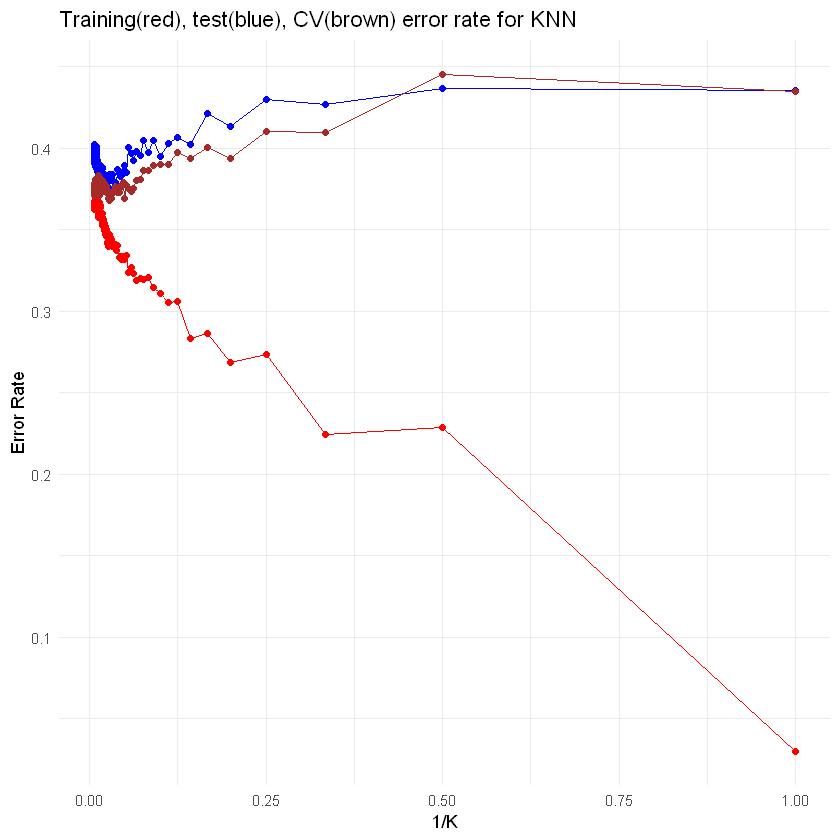

In [17]:
errors = data.frame(train_error, test_error,cv_error, k_range)
ggplot(errors,color = Error, aes(x = 1/k_range)) + 
  geom_line(aes(y = train_error), col = "red") + geom_point(aes(y = train_error), col = "red") +
  geom_line(aes(y = test_error), col = "blue") + geom_point(aes(y = test_error), col = "blue") +
  geom_line(aes(y = cv_error), col = "brown") + geom_point(aes(y = cv_error), col = "brown") +
  ylab("Error Rate") + xlab("1/K") + ggtitle("Training(red), test(blue), CV(brown) error rate for KNN") + 
  theme_minimal()

### Problem 3

The textbook (“An Introduction to Statistical Learning with Applications
in R”) describes that the cv.glm() function can be used in order to
compute the LOOCV error estimate. Alternatively, one could compute
those quantities using just the glm() and predict.glm() functions,
and a for loop. You will now take this approach in order to
compute the LOOCV error for a logistic regression model on the
Weekly data set (in the ISLR package).

**a) Fit a logistic regression model that predicts Direction using
Lag1 and Lag2. Report and comment on the result.**

In [69]:
library(ISLR)

In [70]:
data = Weekly
summary(data)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

In [71]:
data$Direction = relevel(data$Direction, ref="Up")

In [72]:
mod_log=glm(Direction~Lag1+Lag2,data=data,family=binomial)
summary(mod_log)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.506  -1.083  -1.001   1.261   1.623  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.22122    0.06147  -3.599 0.000319 ***
Lag1         0.03872    0.02622   1.477 0.139672    
Lag2        -0.06025    0.02655  -2.270 0.023232 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1488.2  on 1086  degrees of freedom
AIC: 1494.2

Number of Fisher Scoring iterations: 4


**b)** Fit a logistic regression model that predicts Direction using
Lag1 and Lag2 using all but the first observation. Report and
comment on the result.

In [73]:
mod_log_b=glm(Direction~Lag1+Lag2,data=data[-1,],family=binomial)
summary(mod_log_b)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = data[-1, 
    ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5071  -1.0819  -0.9999   1.2617   1.6258  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.22324    0.06150  -3.630 0.000283 ***
Lag1         0.03843    0.02622   1.466 0.142683    
Lag2        -0.06085    0.02656  -2.291 0.021971 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1494.6  on 1087  degrees of freedom
Residual deviance: 1486.5  on 1085  degrees of freedom
AIC: 1492.5

Number of Fisher Scoring iterations: 4


**(c)** Use the model from (b) to predict the direction of the first observation.
You can do this by predicting that the first observation
will go up if Pr(Direction=“Up” j Lag1, Lag2) > 0.5. Was this
observation correctly classified?

In [74]:
head(data)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


In [63]:
data[1,]

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.27,Down


<font color="red">question here!</font>

In [75]:
predict(mod_log_b, data[1,]， type="response")

1 
0.4286077

In [76]:
# check
# Question here
num = predict(mod_log_b, data[1,])
binomial()$linkinv(num)

1 
0.4286077

In [66]:
plogis(predict(mod_log_b, data[1,]))

1 
0.5713923

**(d)** Write a for loop from i = 1 to i = n, where n is the number of
observations in the data set, that performs each of the following
steps:

In [52]:
head(data)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


In [77]:
data$Direction[4]

[1] Up
Levels: Up Down

In [71]:
count = 1
count = count + 1
count

[1] 2

In [72]:
n=dim(data)[1]
count = 0
for (i in 1:n){
    mod_log_d=glm(Direction~Lag1+Lag2,data=data[-i,],family=binomial)
    num = predict(mod_log_d, data[i,])
    prob = binomial()$linkinv(num)
    if (prob >= 0.5){
        label = "Up"
    }else{
        label = "Down"
        }
    if (label != data$Direction[i]){
        count = count + 1
        }
}

In [75]:
test_error = count/n
test_error

[1] 0.4499541